In [38]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
train = pd.read_csv("/home/manu/Documents/Data Projects/Network Intrusion Detection/datasets/Train_data.csv")
test = pd.read_csv("/home/manu/Documents/Data Projects/Network Intrusion Detection/datasets/Test_data.csv")

In [13]:
# display the first 10 rows in the train DataFrame
print(train.head(10))

# print number of rows and columns in the train DataFrame
print("Training data has {} rows and {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2       

In [14]:
# display the first 10 rows in the test DataFrame
print(test.head(10))

# print number of rows and columns in the test DataFrame
print("Training data has {} rows and {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   
5         0           tcp      http    SF        267      14515     0   
6         0           tcp      smtp    SF       1022        387     0   
7         0           tcp    telnet    SF        129        174     0   
8         0           tcp      http    SF        327        467     0   
9         0           tcp       ftp    SF         26        157     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...           

In [33]:
# Generate Descriptive statistics
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# display frequency count to understand the distribution of the values, and check if data is balanced
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

In [17]:
#'num_outbound_cmds' is a redundant column, hence remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [20]:
# Count the number of occurrences of each unique value in the 'class' column
# of the train DataFrame, and return the result as a pandas Series
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler class and assign in to 'scaler'
scaler = StandardScaler()


# select numerical columns from the train and test DataFrame and store it in cols variable
cols = train.select_dtypes(include=['float64','int64']).columns

# standardize the numerical columns of the train DataFrame and store it in sc_train
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))

# standardize the numerical columns of the test DataFrame and store it in sc_test
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))


# create new DataFrame sc_traindf from the standardized train data and assign the original column names to it
sc_traindf = pd.DataFrame(sc_train, columns = cols)

# create new DataDrame sc_testdf from the standardized test data and assign the original column names to it
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [28]:
# import the LabelEncoder class from sklearn library
from sklearn.preprocessing import LabelEncoder

# create an instance of the LabelEncoder class
encoder = LabelEncoder()

# select the categorical columns from the train and test DataFrame
category_train = train.select_dtypes(include=['object']).copy()
category_test = test.select_dtypes(include=['object']).copy()

# encode the categorical columns of the category_train DataFrame and store it in trainCategory
trainCategory = category_train.apply(encoder.fit_transform)

# encode the categorical columns of the category_test DataFrame and store it in testCategory
testCategory = category_test.apply(encoder.fit_transform)

# separate the class column from the trainCategory DataFrame and store it in cat_Ytrain
cat_Ytrain = trainCategory[['class']].copy()

# create new DataFrame enctrain from the trainCategory DataFrame by removing the class column
enctrain = trainCategory.drop(['class'], axis=1)


In [31]:
# combine the scaled numerical DataFrame sc_traindf and encoded categorical DataFrame enctrain along the columns
train_x = pd.concat([sc_traindf,enctrain],axis=1)

# extract the class column from the original train DataFrame and store it in train_y
train_y = train['class']

# check the shape of the combined DataFrame
train_x.shape

(25192, 40)

In [32]:
# combine the scaled numerical DataFrame sc_testdf and encoded categorical DataFrame testcat along the columns
test_df = pd.concat([sc_testdf,testcat],axis=1)

# check the shape of the combined test DataFrame
test_df.shape


(22544, 40)

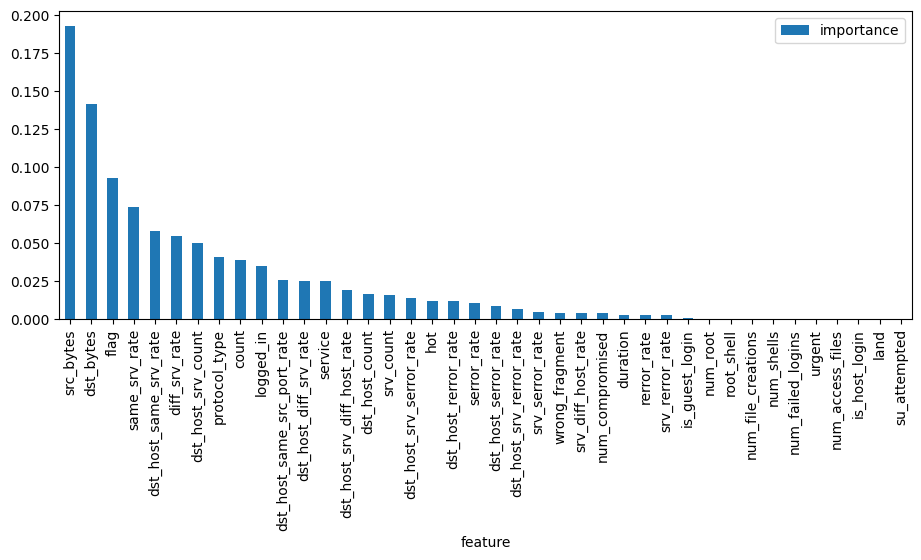

In [39]:
# import RandomForestClassifier class from sklearn ensemble module
from sklearn.ensemble import RandomForestClassifier

# create an instance of the RandomForestClassifier class
rfc = RandomForestClassifier();

# fit the random forest classifier to the training data
rfc.fit(train_x, train_y);

# extract feature importances and store them in a variable 'score'
score = np.round(rfc.feature_importances_,3)

# create a DataFrame containing feature importances and feature names
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})

# sort the DataFrame by feature importances in descending order
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot the feature importances using a bar chart
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


In [42]:
# import RFE module from sklearn feature selection
from sklearn.feature_selection import RFE
import itertools

# create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)

# fit the RFE model to the training data
rfe = rfe.fit(train_x, train_y)

# create a list of selected features and their names
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

# print the selected features
print(selected_features)

['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'protocol_type', 'service', 'flag']


In [50]:
# import train_test_split function from sklearn model selection
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
# X_train - training data for the independent variables
# Y_train - training data for the dependent variable
# X_test - testing data for the independent variables
# Y_test - testing data for the dependent variable
# train_size - percentage of data to be used for training (0.70 = 70%)
# random_state - seed for random number generator, to ensure reproducibility
X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)


In [55]:
# import various classification models from sklearn
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

/home/manu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
# Evaluate Models


# import metrics module from sklearn
from sklearn import metrics

# create a list of models to evaluate
models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

# evaluate each model in the list
for i, v in models:
    # perform 10-fold cross validation
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    # calculate accuracy score
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    # calculate confusion matrix
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    # calculate classification report
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('{} Model Evaluation'.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


Naive Baye Classifier Model Evaluation

Cross Validation Mean Score:
 0.9071666840303904

Model Accuracy:
 0.9071679709651809

Confusion matrix:
 [[7000 1245]
 [ 392 8997]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.85      0.90      8245
      normal       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634



Decision Tree Classifier Model Evaluation

Cross Validation Mean Score:
 0.9960869883971739

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8245
      normal       1.00      1.00      1.00      9389

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg  

In [71]:
# Validating Models


# evaluate each model in the list on the test set
for i, v in models:
    # calculate accuracy score on the test set
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    # calculate confusion matrix on the test set
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    # calculate classification report on the test set
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('{} Model Test Results'.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print() 



Naive Baye Classifier Model Test Results

Model Accuracy:
 0.906721354855782

Confusion matrix:
 [[2981  517]
 [ 188 3872]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      3498
      normal       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558



Decision Tree Classifier Model Test Results

Model Accuracy:
 0.9947075946017465

Confusion matrix:
 [[3483   15]
 [  25 4035]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3498
      normal       1.00      0.99      1.00      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



KNeighborsClassifier Model Test Results

In [73]:
# use the trained KNeighborsClassifier model to predict the classes of the test data
pred_knn = KNN_Classifier.predict(test_df)

# use the trained BernoulliNB model to predict the classes of the test data
pred_NB = BNB_Classifier.predict(test_df)

# use the trained LogisticRegression model to predict the classes of the test data
pred_log = LGR_Classifier.predict(test_df)

# use the trained DecisionTreeClassifier model to predict the classes of the test data
pred_dt = DTC_Classifier.predict(test_df)
